In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

kernel = np.ones((5,5),np.uint8)
window_name = 'image'

In [14]:
img = cv2.imread("../CSE483 Sp24 Project Test Cases/03-Leffy-bina-ya-donya.png")
print(img.shape)

window_name = 'image'

cv2.imshow(window_name, img) 

cv2.waitKey(0)
cv2.destroyAllWindows()

(1012, 1012, 3)


In [15]:
se_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (100, 100))
se_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))

dilation = cv2.dilate(img,se_ellipse,iterations = 1)

opening = cv2.morphologyEx(img, cv2.MORPH_CLOSE, se_rect)

cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)

cv2.imshow(window_name, opening) 

cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
# define the alpha and beta
alpha = 1.5 # Contrast control
beta = 2 # Brightness control

cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
# call convertScaleAbs function
adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

cv2.imshow(window_name, img) 

cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
#For adjusting test case number 4
img = cv2.imread("../CSE483 Sp24 Project Test Cases/04-Black-mirror.png")


black_Mir = cv2.bitwise_not(img) #inverting the image
black_Mir = cv2.flip(black_Mir, 1) #mirroring the image

# Adjusting brightness
black_Mir[black_Mir == 187] = 0

# Display the modified image
cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
cv2.imshow(window_name, black_Mir)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [17]:
#For adjusting test case number 3

img = cv2.imread("../CSE483 Sp24 Project Test Cases/03-Leffy-bina-ya-donya.png")

mirror = cv2.flip(img, 0) #mirroring the image
mirror = cv2.flip(img, -1) #mirroring the image

# Display the modified image
cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
cv2.imshow(window_name, mirror)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [18]:
img = cv2.imread("../CSE483 Sp24 Project Test Cases/12-mal7-w-felfel.png")

img = cv2.medianBlur(img, 21)

# Display the modified image
cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
cv2.imshow(window_name, img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
img = cv2.imread("../CSE483 Sp24 Project Test Cases/05-Caesar-cipher.png")

se_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 40))
opening = cv2.morphologyEx(img, cv2.MORPH_CLOSE, se_rect)


# Display the modified image
cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
cv2.imshow(window_name, opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
def give_me_circle_mask_nowww(mask_size, radius):
    mask = np.zeros(mask_size)
    cy = mask.shape[0] // 2
    cx = mask.shape[1] // 2
    return cv2.circle(mask, (cx,cy), radius, (255,255,255), -1).astype(np.uint8)

def try_lowpass(dft_img, limit, gaussian: bool = False):
    mask = give_me_circle_mask_nowww(dft_img.shape, limit)
    if (gaussian): mask = cv2.GaussianBlur(mask, (21,21), 0)
    dft_img_shifted = np.fft.fftshift(dft_img)
    dft_img_shifted_lowpass = np.multiply(dft_img_shifted, mask)
    plot_shifted_fft_and_ifft(dft_img_shifted_lowpass)

def try_highpass(dft_img, limit, gaussian: bool = False, keep_dc: bool = False):
    mask = ~give_me_circle_mask_nowww(dft_img.shape, limit)
    if (gaussian): mask = cv2.GaussianBlur(mask, (21,21), 0)
    if (keep_dc): mask[dft_img.shape[0]//2, dft_img.shape[1]//2] = 255
    dft_img_shifted = np.fft.fftshift(dft_img)
    dft_img_shifted_highpass = np.multiply(dft_img_shifted, mask)
    plot_shifted_fft_and_ifft(dft_img_shifted_highpass)

def plot_shifted_fft_and_ifft(dft_img_shifted):
    img = np.fft.ifft2(np.fft.ifftshift(dft_img_shifted))
    fig, (ax1, ax2) = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)
    ax1.set(yticks=[0, img.shape[0]//2, img.shape[0] - 1], yticklabels=[-img.shape[0]//2, 0, img.shape[0]//2 - 1]);
    ax1.set(xticks=[0, img.shape[1]//2, img.shape[1] - 1], xticklabels=[-img.shape[1]//2, 0, img.shape[1]//2 - 1]);
    ax1.imshow(np.abs(dft_img_shifted)**0.1, cmap = 'gray');
    ax2.imshow(np.abs(img), cmap = 'gray')

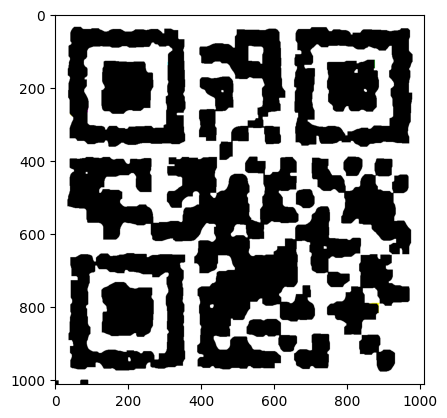

In [64]:
#For Solving Test case 12 mal7-w-felfel
#I have no idea why 

img = cv2.imread("../CSE483 Sp24 Project Test Cases/12-mal7-w-felfel.png")
se_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))


blurred_image = cv2.medianBlur(img, 9)

for i in range(4):
    blurred_image = cv2.medianBlur(blurred_image, 9)


# plt.hist(blurred_image.ravel(), bins= 256)
# plt.show

re, adth = cv2.threshold(blurred_image, 125,255, cv2.THRESH_BINARY)

adth = cv2.medianBlur(adth, 5)

closing = cv2.morphologyEx(adth, cv2.MORPH_CLOSE, se_rect)
se_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
erode = cv2.erode(closing, se_rect, 3)
opening = cv2.morphologyEx(erode, cv2.MORPH_OPEN, se_rect)


plt.imshow(opening, cmap='gray')